# Poster Q-TURN 2020
# CNOT circuit synthesis for topologically-constrained quantum memories
Authors: **A. Kissinger and R. A. Meijer - van de Griend**

The full paper is available at http://www.rintonpress.com/xxqic20/qic-20-78/0581-0596.pdf or as pre-print on ArXiv https://arxiv.org/pdf/1904.00633.pdf

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Quantomatic/pyzx/blob/steiner-decomp/scratchpads/Q-TURN%20SteinerGauss%20Poster.ipynb)

TODO - Explanation of how the "poster" works.

[![Unitary Fund](https://img.shields.io/badge/Supported%20By-UNITARY%20FUND-brightgreen.svg?style=for-the-badge)](http://unitary.fund)

## Introduction
Quantum circuits give a de facto standard for representing quantum computations at a low
level. They consist of sequences of primitive operations, called quantum gates, applied to a
register of quantum bits, or qubits. Increasingly, noisy intermediate-scale quantum (NISQ)
computers with 10-80 qubits are becoming a reality. Popular physical realisations such as
superconducting quantum circuits \[1, 2, 3\] and ion traps \[4, 5, 6, 7\] consist of qubits stored
in the physical states of systems arranged in space, where two-qubit operations are typically
only possible between pairs of adjacent systems. Hence, when it comes to actually running
a quantum computation on these architectures, logical qubits must be mapped to physical
memory locations, and the circuit must be modified to only consist of 2-qubit operations
between adjacent qubits in the physical architecture. Na¨ıvely, this can be achieved by simply
inserting swap gates to move a pair of qubits next to each other before each 2-qubit operation.
However, this approach comes with an enormous overhead in terms of 2-qubit operations, each
of which introduces a great deal more noise than a single qubit operation on most realistic
architectures \[5\]. More sophisticated approaches incorporate techniques from computer aided
design \[8\] and machine-learning \[9\] in order to minimise the extra operations needed by
making good choices of initial and intermediate memory locations for the qubits involved.
Nevertheless, these are simply refinements of the basic ‘search and swap’ approach. Most
approaches only take the topological structure of the circuit into account (i.e. which qubits
are being acted upon) rather than semantic structure (i.e. the unitary being implemented),
and hence miss out on opportunities for more efficient circuit mapping.


## Steiner Gauss algorithm
This section contains the algorithm description from the [original paper](http://www.rintonpress.com/xxqic20/qic-20-78/0581-0596.pdf) for easy referencing.


Our approach to CNOT mapping is based on re-synthesising the CNOT circuit from its
corresponding parity map. By a parity map, we mean any reversible linear map on bitstrings.
That is, we mean a bijective mapping from N-bitstrings to N-bitstrings where each bit in the
output is a parity (i.e. XOR) of the input bits. It is a well-known fact that such maps exactly
correspond to the action of CNOT circuits on computational basis states. It is therefore
convenient to represent the action of a CNOT circuit on N qubits as an N × N matrix over
GF(2).

If we consider an arbitrary such parity map, it is straightforward to check that postcomposing a CNOT gate with a control on the j-th qubit and the target on the k-th qubit
has the overall effect of adding the j-th row to the k-th row:

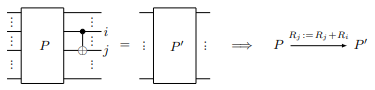

Hence, there is an evident way to construct a CNOT circuit that realises an arbitrary parity
matrix P. Simply perform Gauss-Jordan elimination on P, post-composing CNOTs for each
primitive row operation. In the end, we will obtain CP = 1, where C is a known CNOT
circuit. Then, P = C
−1
, where C
−1
is obtained from C just by reversing the order of CNOT
gates. In other words, in order to synthesise a CNOT circuit which realises parity map P,
we simply perform Gauss-Jordan and store the primitive row operations used. Then the
CNOT circuit corresponds exactly to that sequence of row operations, in reverse order. This
technique, when combined with a simple heuristic for choosing appropriate row operations, is
able to obtain asymptotically optimal CNOT realisations of a given parity map \[24\].

Initially, we will consider only graphs G which have a Hamiltonian path, i.e. graphs G
which contain a connected path P that visits each of the vertices in G exactly once. For
example, the 3 × 3 grid:

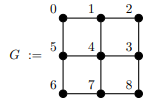

has a Hamiltonian path given by [0, 1, 2, . . . , 8]. We will assume this path also provides a total
ordering ≤ on the vertices of G. We will remove the assumption of a Hamiltonian path in the
next section by providing a recursive algorithm capable of handling arbitrary graphs.


We begin by labelling the rows of our parity map P by the vertices of the constraint graph
G. The first stage of our algorithm, steiner-down, computes an upper triangular matrix.
To do this, we wish to remove the non-zero elements below the diagonal. We do this one
column at a time, starting with column k := 0 and proceeding left to right. Let S be the set
containing k itself, as well as all of the vertices j such that j > k and Pjk = 1. That is, S
contains the diagonal element and all of the rows which contain 1s below the diagonal. For
example, in the following parity map, S = {0, 2, 7}:

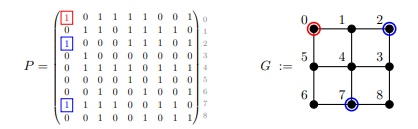

These vertices are not adjacent in the graph, hence when we compute the Steiner tree T
containing S, we get some extra vertices, corresponding to rows that have 0s below the
diagonal:

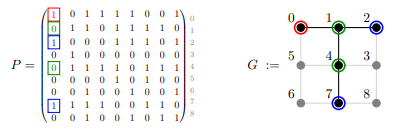

These extra vertices which need to be added to get a spanning tree are sometimes called
Steiner points. We consider the numbers in boxes above as decorating the corresponding
vertices of the Steiner tree T. Initially there are some 0s in the Steiner tree corresponding to
Steiner points (and possibly the diagonal element), so we first ‘fill’ the Steiner tree. That is,
we add a row with a 1 to any neighbouring row in T with a 0. Since the tree is connected,
after finitely many iterations this will propagate 1s into every location in T:

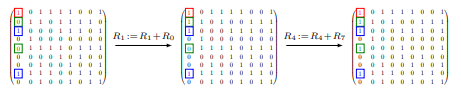

After that, we can ‘empty’ the Steiner tree by setting every location except for the diagonal
to zero. We do this by regarding the diagonal as the root of the tree. For each leaf v in T with
parent w, perform the row operation Rv := Rv + Rw, then remove v from T. This terminates
when there is only one vertex left in T, the root.

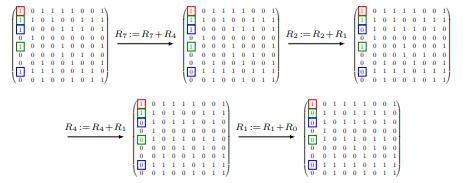

Since we only perform row operations along edges of T, which are a subset of the edges of
G, the corresponding CNOTs in the circuit we synthesise will only be between neighbouring
qubits. For example, the six row operations above (read from right to left) yield the following
part of a CNOT circuit:

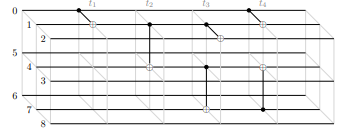

Note that in this phase, we have some freedom to choose which row operations to perform.
Here we have taken a greedy strategy for maximising the number of row operations that can
be done in parallel.
Having put the first column in upper triangular form, we delete the corresponding root
vertice from G and then proceed to the next column, building up our CNOT circuit from right-to-left. Since we proceed in order along a Hamiltonian path, the graph never becomes
disconnected and always has a Hamiltonian path. Hence it is always possible to find a Steiner
tree for any combination of points. steiner-down terminates after we remove the last vertex
from G with a matrix in upper triangular form.
The second stage of our algorithm, steiner-up, starts with the original graph G and
a parity map P in upper triangular form and removes any 1s that are above the diagonal,
yielding the reduced echelon form (which in our case is always an identity matrix). It works
in almost the same way, except that some care must be taken not to destroy the existing
upper triangular structure. To do this, we must always perform decreasing row operations.
That is, we must perform operations of the form Rj := Rj + Ri only when j < i. This
is where Definition 2 comes in. Starting with the last column, let the set S consist of the
diagonal element and the rows which contain 1s above the diagonal. We then compute a
decreasing Steiner tree for S whose root is the diagonal element. A decreasing Steiner tree
can be easily created by giving the edges in graph G a direction from larger nodes to smaller
ones. Such a descreasing Steiner tree always exists, because in the worse case we can just
take the Hamiltonian path for T, but in general we can take shortcuts. For example:

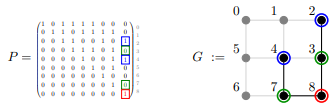

Here, we have S = {2, 4, 8} and T has vertices {2, 3, 4, 7, 8}. Note there is indeed a smaller
Steiner tree which does not contain vertex 7, but in that case 4 would need to be a child of
3, hence it is not a decreasing Steiner tree.
Once we have a decreasing Steiner tree, we can ‘fill’ the tree with 1s by decreasing row
operations. This is always possible since at this stage, the root always contains a 1 and all
edges from parents to children are decreasing. We can then ‘empty’ the tree again just as we
did in steiner-down, noting that every row operation at this stage is applied from a parent
to its child (and hence is decreasing). The resulting row operations in the above example are
thus:

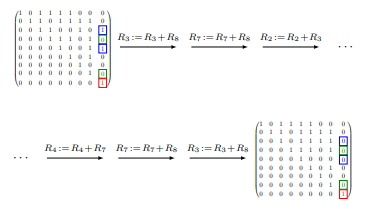

We can therefore prepend the following section to our CNOT circuit:

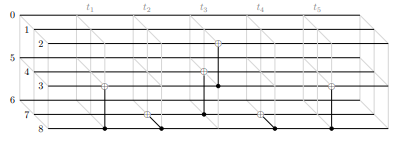

Once a column is done, we can delete it from G and take the next highest column. Again,
since we traverse along a Hamiltonian path (backwards this time), the graph G never becomes
disconnected and always has a Hamiltonian path. steiner-up then terminates with P equal
to the identity matrix. The corresponding CNOT circuit then implements the original parity
map using only nearest-neighbour CNOT gates.
Much like other approaches, the size of the final circuit is very sensitive to the initial layout
of the logical qubits within the physical architecture, especially for relatively small CNOT
circuits. For us, a good choice of qubit positions means smaller Steiner trees, which in turn
means that fewer extra CNOTs are added. The placement of qubits on the architecture is
equivalent to permuting the rows and columns of the parity map before applying the algorithm
described above. Hence, we use a genetic algorithm [29] to find an optimal permutation such
that the resulting circuit contains as little gates as possible.

## Code example
The implementation of our algorithm is freely available on the [PyZX GitHub repository](https://github.com/Quantomatic/pyzx/tree/steiner-decomp). Below we give a small example of how it can be used. 

The algorithm itself is implemented as the ``` steiner_gauss(...) ``` function in [pyzx/routing/steiner.py](https://github.com/Quantomatic/pyzx/blob/steiner-decomp/pyzx/routing/steiner.py).



First install the necessary dependencies.

In [8]:
!pip install https://github.com/Quantomatic/pyzx/archive/steiner-decomp.zip

  Using cached https://github.com/Quantomatic/pyzx/archive/steiner-decomp.zip
  Created wheel for pyzx: filename=pyzx-0.6.2-cp36-none-any.whl size=186296 sha256=72e40927726dd5786eaefc9b396c01274faea27e4b16fd9a0a53a8aacb77ef69
  Stored in directory: /root/.cache/pip/wheels/5c/7f/77/b458c966a54a9010bc1d0d39c07e5db8e7c43a503e4e20e6a2
Successfully built pyzx


In [9]:
import pyzx as zx
import pyzx.scripts.cnot_mapper 

Then, we load a .qasm file with a CNOT circuit.

We create an architecture that the circuit should be compiled to.

Then we route the circuit to the given architecture.

## Results
TODO - Something about optimizing qubit placement with genetic algorithm. Something about experimental setup.




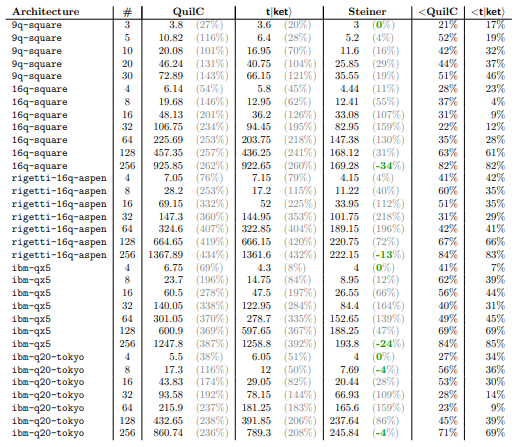

TODO - Something about meaning of the table.

## New work since the paper came out
Since this algorithm has been proposed, various alternatives, improvements and extensions have been proposed for architecture-aware synthesis of quantum circuits. In this section, we will give an overview.

### Alternatives and improvements
TODO Something about [Staq](https://iopscience.iop.org/article/10.1088/2058-9565/ab9359) [github](https://github.com/softwareQinc/staq) 
-Uses [Mosca paper](https://iopscience.iop.org/article/10.1088/2058-9565/ab79b1/pdf?casa_token=zEx7BuTVxZYAAAAA:pb1FvrKno_1TtwCMoJ0jZ6ER2cy7u_3AtdSyziF2CvuZbBuspbP2oEzJjYI4v-jvVHl9nvYYBxM) - , [non-cut vertices improvement](https://arxiv.org/pdf/1910.14478.pdf),  [syndrome improvement](https://link.springer.com/chapter/10.1007/978-3-030-52482-1_11)

### Extensions to Phase polynomials
TODO Something anout  [Mosca paper](https://iopscience.iop.org/article/10.1088/2058-9565/ab79b1/pdf?casa_token=zEx7BuTVxZYAAAAA:pb1FvrKno_1TtwCMoJ0jZ6ER2cy7u_3AtdSyziF2CvuZbBuspbP2oEzJjYI4v-jvVHl9nvYYBxM), [My CQC paper](https://arxiv.org/pdf/2004.06052.pdf).


## Conclusion
We have introduced a new paradigm for routing quantum circuits based on synthesising CNOT gates. We have shown that for quantum circuits consisting of purely CNOT gates, this technique uses less CNOT gates than traditional routing methods.

Moreover, we have given an overview of improvements that have been proposed for this algorithm in subsequent papers.


## References
1. Matthew Reagor, Christopher B Osborn, Nikolas Tezak, Alexa Staley, Guenevere Prawiroatmodjo,
Michael Scheer, Nasser Alidoust, Eyob A Sete, Nicolas Didier, Marcus P da Silva, et al. Demonstration of universal parametric entangling gates on a multi-qubit lattice. Science advances,
4(2):eaao3603, 2018.
2. IBM. IBM unveils world’s first integrated quantum computing system for commercial use. https://newsroom.ibm.com/2019-01-08-IBM-Unveils-Worlds-First-Integrated-QuantumComputing-System-for-Commercial-Use, 2019. Accessed: 2019-03-28.
3. R Versluis, S Poletto, N Khammassi, N Haider, DJ Michalak, A Bruno, K Bertels, and L DiCarlo.
Scalable quantum circuit and control for a superconducting surface code. arXiv:1612.08208, 2016.
4. Joseph W Britton, Brian C Sawyer, Adam C Keith, C-C Joseph Wang, James K Freericks, Hermann Uys, Michael J Biercuk, and John J Bollinger. Engineered two-dimensional ising interactions
in a trapped-ion quantum simulator with hundreds of spins. Nature, 484(7395):489, 2012.
5. CJ Ballance, TP Harty, NM Linke, MA Sepiol, and DM Lucas. High-fidelity quantum logic gates
using trapped-ion hyperfine qubits. Physical Review Letters, 117(6):060504, 2016.
6. JP Gaebler, TR Tan, Y Lin, Y Wan, R Bowler, AC Keith, S Glancy, K Coakley, E Knill,
D Leibfried, et al. High-fidelity universal gate set for be 9+ ion qubits. Physical Review Letters, 117(6):060505, 2016.
7. WK Hensinger, S Olmschenk, D Stick, D Hucul, M Yeo, M Acton, L Deslauriers, C Monroe, and
J Rabchuk. T-junction ion trap array for two-dimensional ion shuttling, storage, and manipulation.
Applied Physics Letters, 88(3):034101, 2006.
8. Alwin Zulehner, Alexandru Paler, and Robert Wille. An efficient methodology for mapping quantum circuits to the IBM QX architectures. IEEE Transactions on Computer-Aided Design of
Integrated Circuits and Systems, 2018.
9. Steven Herbert and Akash Sengupta. Using reinforcement learning to find efficient qubit routing
policies for deployment in near-term quantum computers. arXiv:1812.11619, 2018.
10. Alexander Cowtan, Silas Dilkes, Ross Duncan, Alexandre Krajenbrink, Will Simmons, and Seyon
Sivarajah. On the qubit routing problem. arXiv:1902.08091, 2019.
11. Matthew Amy, Dmitri Maslov, and Michele Mosca. Polynomial-time T-depth optimization of
Clifford+ T circuits via matroid partitioning. IEEE Transactions on Computer-Aided Design of
Integrated Circuits and Systems, 33(10):1476–1489, 2014.
12. Ross Duncan, Alex Kissinger, Simon Perdrix, and John van de Wetering. Graph-theoretic Simplification of Quantum Circuits with the ZX-calculus. https://arxiv.org/abs/1902.03178, 2019.
13. B. Coecke and R. Duncan. Interacting quantum observables. In Proceedings of the 37th International Colloquium on Automata, Languages and Programming (ICALP), Lecture Notes in
Computer Science, 2008.
14. Aleks Kissinger and John van de Wetering. PyZX: A circuit optimisation tool based on the
ZX-caculus. http://github.com/Quantomatic/pyzx.
15. Aleks Kissinger and John van de Wetering. Reducing t-count with the zx-calculus.
arXiv:1903.10477, 2019.
16. Prakash Murali, Ali Javadi-Abhari, Frederic T Chong, and Margaret Martonosi. Formal
constraint-based compilation for noisy intermediate-scale quantum systems. Microprocessors and
Microsystems, 2019.
17. Davide Venturelli, Minh Do, Eleanor Rieffel, and Jeremy Frank. Compiling quantum circuits
to realistic hardware architectures using temporal planners. Quantum Science and Technology,
3(2):025004, 2018.
18. Alexandru Paler, Alwin Zulehner, and Robert Wille. NISQ circuit compilers: search space structure
and heuristics. arXiv:1806.07241, 2018.
19. Gushu Li, Yufei Ding, and Yuan Xie. Tackling the qubit mapping problem for NISQ-era quantum
devices. arXiv:1809.02573, 2018.
20. Davide Ferrari and Michele Amoretti. Demonstration of envariance and parity learning on the
IBM 16 qubit processor. arXiv:1801.02363, 2018.
21. Alexandru Paler. On the influence of initial qubit placement during NISQ circuit compilation.
arXiv:1811.08985, 2018.
22. Beatrice Nash, Vlad Gheorghiu, and Michele Mosca. Quantum circuit optimizations for NISQ
architectures. arXiv preprint arXiv:1904.01972, 2019.
23. Aleks Kissinger and Arianne Meijer-van de Griend. CNOT circuit extraction for topologicallyconstrained quantum memories. arXiv preprint arXiv:1904.00633, 2019.
24. Ketan N. Patel, Igor L. Markov, and John P. Hayes. Optimal synthesis of linear reversible circuits.
Quantum Info. Comput., 8(3):282–294, March 2008.
25. Richard M Karp. Reducibility among combinatorial problems. In Complexity of computer computations, pages 85–103. Springer, 1972.
26. Gabriel Robins and Alexander Zelikovsky. Improved steiner tree approximation in graphs. In
SODA, pages 770–779. Citeseer, 2000.
27. Jaroslaw Byrka, Fabrizio Grandoni, Thomas Rothvoß, and Laura Sanit`a. An Improved LP-based
Approximation for Steiner Tree. In Proceedings of the Forty-second ACM Symposium on Theory
of Computing, STOC ’10, pages 583–592, New York, NY, USA, 2010. ACM.
28. Thomas H Cormen, Charles E Leiserson, Ronald L Rivest, and Clifford Stein. Introduction to
algorithms. MIT press, 2009.
29. David E Golberg. Genetic algorithms in search, optimization, and machine learning. Addion
wesley, 1989(102):36, 1989.
30. Robert S Smith, Michael J Curtis, and William J Zeng. A practical quantum instruction set
architecture. arXiv:1608.03355, 2016.
31. Christopher M Dawson, Andrew P Hines, Duncan Mortimer, Henry L Haselgrove, Michael A
Nielsen, and Tobias J Osborne. Quantum computing and polynomial equations over the finite
field z2. Quantum Information & Computation, 5(2):102–112, 2005.
32. Matthew Amy, Parsiad Azimzadeh, and Michele Mosca. On the controlled-not complexity of
controlled-not–phase circuits. Quantum Science and Technology, 4(1):015002, 2018.
33. An Update on Google’s Quantum Computing Initiative. Slides for presantation at FOSDEM 2019. https://fosdem.org/2019/schedule/event/google_qc/attachments/slides/3082/
export/events/attachments/google_qc/slides/3082/GoogleQuantumCirq.. Accessed 1 May, 2019.
34. Performance parameters for Rigetti QPUs. https://www.rigetti.com/qpu. Accessed 1 May, 2019